In [1]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

### Abstract

In this blog post, we will implement and test the Perceptron algorithm. This algorithm is one of the oldest machine learning algorithms, and makes up the backbone of many more advanced algorithms that are in use today. Perceptron works by calculating the gradient of a feature matrix and using that gradient to update the weight vector that will eventually separate the data. We will test this on linearly separable data as well as non-linearly separable data, and see how the loss of the function reacts. We will also test our model on 6-dimensional data, or data with 6 features, and see how our model responds.

The code implementing Perceptron for this blog post can be found [here](https://github.com/ellisterling/ellisterling.github.io/blob/main/posts/perceptron/perceptron.py).

### Perceptron Intro

My Perceptron code is all based around a linear model that contains a weight vector, a score function, and a predict function. The Perceptron functionality comes into play with the Perceptron and PerceptronOptimizer classes. The Perceptron loss() function calculates the percentage of misclassified points by comparing the score of X to the expected result vector y. The Perceptron grad() function approximates the gradient by multiplying X by 2y-1 and then multiplying that by -1 * scores * (2y-1) where scores < 0. Finally, the step function updates w by subtracting the gradient from it.

### Experiments

Data generation and plotting code adapted from Prof. Phil Chodrow's lecture notes.

#### Experiment 1: 2D Linearly Separable Data

The first experiment we'll try is one using data that is 2D and linearly separable (or has two distinct classes that don't overlap). We want to check that the resulting weight vector divides these classes exactly.

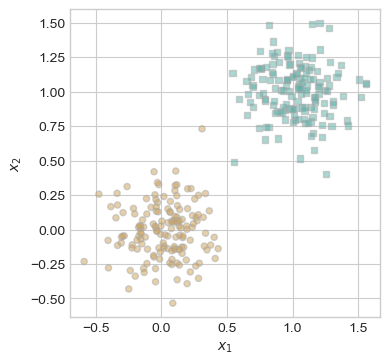

In [2]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

As we can see from this plot, the data is linearly separable. Now, let's test our Perceptron. It should reach a loss of 0, since there should be a vector that perfectly splits the classes.

In [3]:
opt = PerceptronOptimizer()
loss = 1.0
loss_vec = []
n = X.size()[0]
while loss > 0:
    loss = opt.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y)

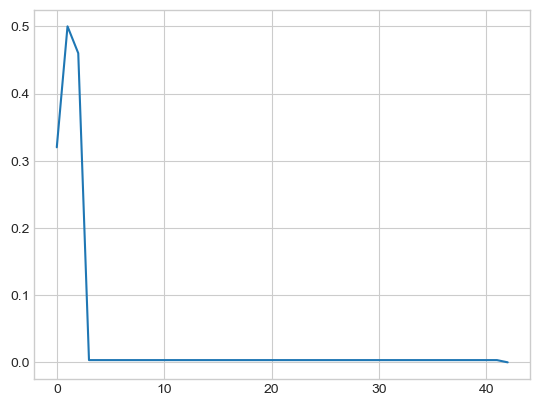

In [4]:
plt.plot(loss_vec)

We can see that our loss function converges to 0! Now, let's get a visualization of our resulting weight vector.

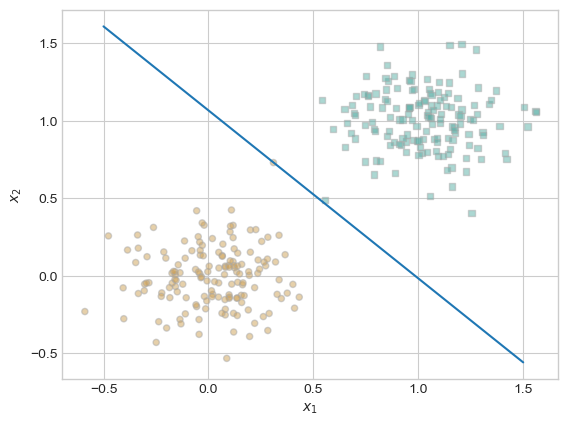

In [5]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)


fig, ax = plt.subplots()
plot_perceptron_data(X, y, ax)
draw_line(opt.w, -0.5, 1.5, ax)

Perfect! We can see that the line separates our classes perfectly.

#### Experiment 2: Non-Linearly Separable Data

Now, we want to test our model's performance on data that is not linearly separable. Because we will not be able to split this data perfectly, we can expect that our function will not converge to 0.

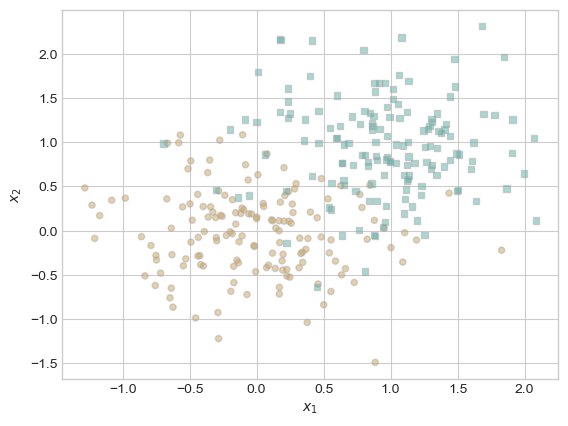

In [6]:
X, y = perceptron_data(noise=0.5)
fig, ax = plt.subplots()
plot_perceptron_data(X, y, ax)

As we can see, the data above is not linearly separable. We'll add another condition to our while loop to make sure that we don't keep running our model forever--1000 is our max number of iterations.

In [7]:
opt = PerceptronOptimizer()
loss = 1.0
loss_vec = []
n = X.size()[0]
i = 0
while loss > 0 and i<=1000:
    loss = opt.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y)
    i+=1

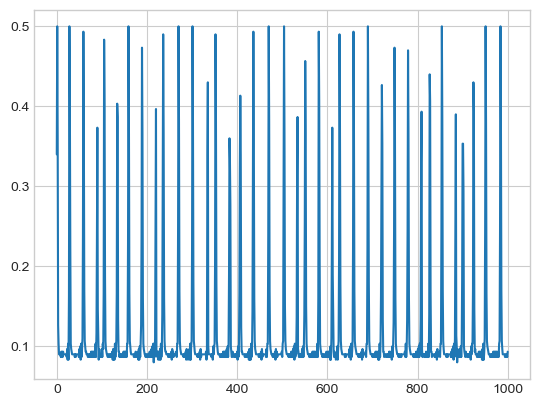

In [8]:
plt.plot(loss_vec)

We can see clearly that it does not converge. However, let's look at our resulting weight vector.

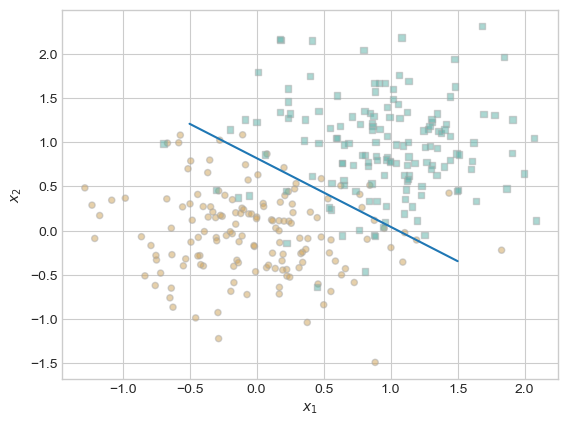

In [9]:
fig, ax = plt.subplots()
plot_perceptron_data(X, y, ax)
draw_line(opt.w, -0.5, 1.5, ax)

It still looks like it separates our data pretty well! However, if we were to use Perceptron on datasets that weren't linearly separable (like most real-world data), we would not have a way to tell when the model had reached the best possible vector for w, and we would have to rely on maximum iterations like we do in this experiment.

#### Experiment 3: 6D Data

Now, let's try to use our model on data with 6 features.

In [10]:
X, y = perceptron_data(p_dims = 6)

In [11]:
opt = PerceptronOptimizer()
loss = 1.0
loss_vec = []
n = X.size()[0]
i = 0
while loss > 0 and i<=1000:
    loss = opt.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y)
    i+=1

Although we can't create a visualization of the vector like we could with the 2D data, we can still take a look at the loss and see if it converges to 0.

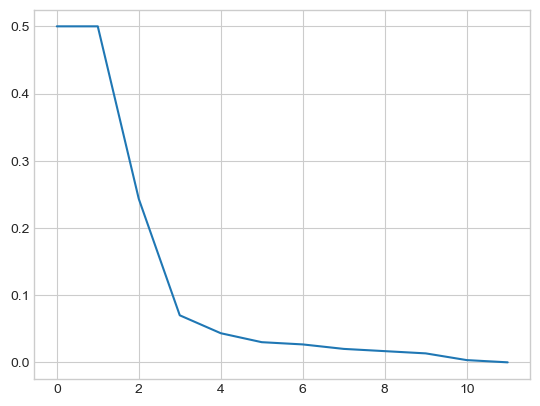

In [12]:
plt.plot(loss_vec)

Wonderful! Our code converges to 0, which indicates that it was able to separate the classes perfectly, and that the data is linearly separable even though it has more features.

### Runtime Complexity

The runtime for one step of the Perceptron algorithm would be O(p), where p is the number of features in the data. It does not depend on the number of data points.

### Discussion

In this blog post, we implemented the Perceptron algorithm. We saw how it worked very well for all linearly separable data, even data with 6 features. In the future, I'd be interested to see how real-world runtime differs if you add many more features (orders of magnitude larger), since the theoretical runtime is certainly affected by features. The model did not converge for data that was not linearly separable. This raises questions about its usefulness for real-world data, since I have almost never encountered real-world datasets that are linearly separable. A lot of the time, there is not one hyperplane that can perfectly separate the classes of data. In these cases, Perceptron could still be used, but the loss won't converge, so an arbitrary maximum number of iterations must be chosen. This leads us to the Logistic Regression algorithm, which is implemented in another blog post, and allows us to use a model that converges on non-linearly separable data.